# 🚀 Kaggle Competition Entry: Enhanced Bank Customer Churn Prediction ❤️


<img title="a title" alt="Alt text" src="bank-churn-img.png" width=500>


* Author: [Muhammad Bilal Khan](https://www.kaggle.com/devbilalkhan)
* Contact:
    - [Kaggle](https://www.kaggle.com/devbilalkhan)
    - [Twitter](https://twitter.com/devbilalkhan)
    - [Github](https://github.com/devbilalkhan)
* Email: bilal.khan@live.com
* Designation: Software Developer & Consultant
  
## Overview
In this competition, we are tasked with predicting bank customer churn based on a unique dataset. This dataset has been synthetically generated by a deep learning model, which was initially trained on the original Bank Customer Churn Prediction dataset. While the features mirror the original to a degree, subtle differences exist that may influence model predictions.

## Objective
The challenge is to not only develop a predictive model with high accuracy for customer churn but also to identify and leverage the nuances between the synthetic and original datasets. Competitors are encouraged to explore the original dataset alongside the provided one, examining the disparities and potentially utilizing it to enhance model robustness and performance.



## Column Descriptions

- **Customer ID**: A distinct ID given to every customer.
- **Surname**: Customer's surname or lastame 
- **Credit Score**: A numerical assessment of the customer's creditworthiness, typically ranging from 300 to 850.
- **Geography**: The customer's country of residence. Possible values include:
  - France
  - Spain
  - Germany
- **Gender**: The gender of the customer. Options are:
  - Male
  - Female
- **Age**: The age of the customer in years.
- **Tenure**: The duration in years that the customer has been with the bank.
- **Balance**: The current balance in the customer's bank account.
- **NumOfProducts**: The count of banking products that the customer is using. This could include savings accounts, credit cards, etc.
- **HasCrCard**: Indicates whether the customer possesses a credit card.
  - `1` for yes
  - `0` for no
- **IsActiveMember**: States if the customer is considered an active member of the bank.
  - `1` for yes
  - `0` for no
- **EstimatedSalary**: An estimate of the customer's annual salary.
- **Exited**: Signifies if the customer has exited, i.e., churned from the bank.
  - `1` for yes
  - `0` for no

This dataset is typically used to model and predict customer churn behavior by analyzing various factors such as credit score, geography, age, and product usage.

# Abstract

In this study, I am analyzing into a bank dataset, initially refining it by cleaning and merging with additional data as recommended for the competition. The dataset was streamlined by removing duplicates, setting the stage for in-depth statistical analysis.

I applied a variety of machine learning models, including CatBoost, Random Forest, LightGBM, and XGBoost, to predict customer retention, a binary classification task. A deep learning approach was also explored to bolster the predictive performance. The models were successful in predicting with a ROC-AUC score of nearly 88.92%, indicating a robust ability to identify customer churn.

This work aims to provide insights into customer behavior, potentially guiding efforts to enhance customer retention strategies.

---

Good luck to all participants — may the best model win!

In [227]:
# Import necessary libraries for data analysis, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline



The following function `print_heading` is used only for the purpose of printing headings text surrounded by lines to make the output look more readable.

In [228]:
# print heading - for display purposes only
def print_heading(heading):
    print('-' * 50)
    print(heading.upper())
    print('-' * 50)

## Load Dataset

Leveraging the synergy of both the original Bank Customer Churn Prediction dataset and the provided synthetic training data, as encouraged, to potentially enhance model accuracy and generalization.

In [229]:
df = pd.read_csv("../projects/data/train.csv")
original_df = pd.read_csv("../projects/data/main.csv")
df_test = pd.read_csv("../projects/data/test.csv")
submission = pd.read_csv("../projects/data/sample_submission.csv")

# 1.0. Dataset Inspection

In [230]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


## Data Types in the Dataset

| DataType | Count |
|----------|-------|
| int64    | 6     |
| float64  | 5     |
| object   | 3     |



## Shape of the Data
The dataset consists of records for 165,034 customers, each with 14 features. Below is the summary of the dataset dimensions:

| Description | Count |
|-------------|-------|
| Customers   | 165034|
| Features    | 14    |

## List all columns

In [232]:
# print the columns as a list
print_heading("Columns")

for col in df.columns:
    print(f"- {col}")


--------------------------------------------------
COLUMNS
--------------------------------------------------
- id
- CustomerId
- Surname
- CreditScore
- Geography
- Gender
- Age
- Tenure
- Balance
- NumOfProducts
- HasCrCard
- IsActiveMember
- EstimatedSalary
- Exited


In [233]:
original_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [234]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [235]:
submission.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


# Dataset Summary Information

In [236]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [237]:
# Target variable
target = "Exited"

# Duplicates Removal and Merging Datasets

In [238]:
# Check for duplicated data for the synthetic data
print_heading("Duplication check")
print(f"Number of duplicated rows: {df.duplicated().sum()}")
print("There are no duplicated rows.")

--------------------------------------------------
DUPLICATION CHECK
--------------------------------------------------
Number of duplicated rows: 0
There are no duplicated rows.


In [239]:
# Check for duplicated data in the original dataset
print_heading("Duplicated Rows")
print(f"Number of duplicated rows: {original_df.duplicated().sum()}")
print(f"There are {original_df.duplicated().sum()} duplicated rows.")

--------------------------------------------------
DUPLICATED ROWS
--------------------------------------------------
Number of duplicated rows: 2
There are 2 duplicated rows.


In [240]:
# drop the duplicated rows 
print_heading("Verifying Duplicated Rows")
original_df = original_df.drop_duplicates()
print(f"Number of duplicated rows: {original_df.duplicated().sum()}")
print("There are no duplicated rows in the original dataset.")

--------------------------------------------------
VERIFYING DUPLICATED ROWS
--------------------------------------------------
Number of duplicated rows: 0
There are no duplicated rows in the original dataset.


# Merging the original dataset with the train dataset

### Drop the id columns
Dropping the "RowNumber" and "id" columns from the dataframes `original_df` and `df` respectively. 

The reason for this is that these columns likely represent identifiers for the rows of data, and do not carry any meaningful information for analysis or model training. 

In [241]:
# drop id and rownumber
original_df = original_df.drop("RowNumber", axis=1)
df = df.drop("id", axis=1)

# check for id columns
print_heading("ID Columns")
print(f"Number of id columns: {original_df.columns.str.contains('id').sum()}")
print("There are no id columns in both datasets.")


--------------------------------------------------
ID COLUMNS
--------------------------------------------------
Number of id columns: 0
There are no id columns in both datasets.


## Merge the datasets

The competition organizers encourage the use of the original Bank Customer Churn Prediction dataset alongside the provided synthetic data. Therefore, I will merge the original dataset with the training data to potentially improve the model's performance as per their guidance.

In [242]:
# Concatenate original_df to df
df = pd.concat([df, original_df], axis=0)


## Shape of the Data After Merge
The dataset consists of records for 175,036 customers, each with 13 features. Below is the summary of the dataset dimensions:

| Description | Count |
|-------------|-------|
| Customers   | 175036|
| Features    | 13    |

# Handling Missing Values

In [243]:
# Display the count of missing values in the DataFrame
print_heading("Missing Values")
df.isna().sum()

--------------------------------------------------
MISSING VALUES
--------------------------------------------------


CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

## Strategy
The data indicates a minimal number of missing values across several columns—only one missing entry each for Geography, Age, HasCrCard, and IsActiveMember. Given the negligible quantity of missing data, I am opting to drop the rows with these missing values to maintain the integrity of the dataset for analysis.

## Drop Missing values values

In [244]:
# Drop missing values and print the number of remaining missing values
df = df.dropna()
print_heading("Dropping Missing Values")
print(f"The number of missing values is: {df.isna().sum().sum()}")
print("All the missing values have been handled.")

--------------------------------------------------
DROPPING MISSING VALUES
--------------------------------------------------
The number of missing values is: 0
All the missing values have been handled.


# Inspecting Labels of Categorical Variables

In [245]:
# Get categorical variables
categorical_variables = df.select_dtypes(include=['object', 'category']).columns
categorical_variables = categorical_variables.drop('Surname')

# Get value counts
value_counts_dict = {variable: df[variable].value_counts() for variable in categorical_variables}

# Prepare data for DataFrame
data_list = [(variable, category, count) for variable, counts in value_counts_dict.items() for category, count in counts.items()]


# Create DataFrame
value_counts_df = pd.DataFrame(data_list, columns=['Variable', 'Category', 'Count']).set_index('Variable')

# Display DataFrame
value_counts_df

,Category,Count
Variable,,
Geography,France,99226
Geography,Spain,38689
Geography,Germany,37115
Gender,Male,98604
Gender,Female,76426


# Visualizing Categorical Variables: Gender and Geography

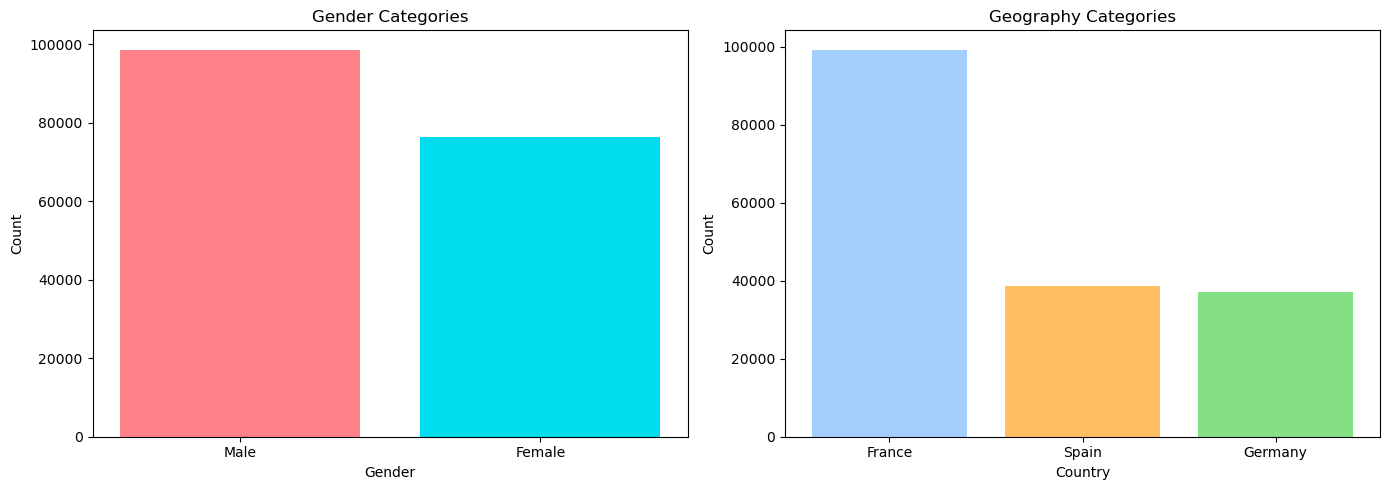

In [246]:
# Filter separator rows
plot_data = value_counts_df[value_counts_df.Category != "---"]

# Define colors
colors = {'Male': '#FF8289', 'Female': '#00ddee', 'France': '#a2cffe', 'Spain': '#febf63', 'Germany': '#85e085'}

# Set bar width
bar_width = 0.4

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 'Gender' data
gender_data = plot_data.loc['Gender']
axes[0].bar(gender_data['Category'], gender_data['Count'], color=[colors[cat] for cat in gender_data['Category']], width=bar_width*2)
axes[0].set_title('Gender Categories')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Gender')

# Plot 'Geography' data
geography_data = plot_data.loc['Geography']
axes[1].bar(geography_data['Category'], geography_data['Count'], color=[colors[cat] for cat in geography_data['Category']], width=bar_width*2)
axes[1].set_title('Geography Categories')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Country')

# Adjust layout
plt.tight_layout()

# Display plots
plt.show()

## Observation
* **Geographic Distribution**: France has the highest count among the listed geographic categories, with 99,226 occurrences, which is substantially higher than those for Spain and Germany. This indicates that within the dataset, France represents the largest geographic segment.

* **Gender Disparity:** There is a noticeable difference in counts between genders, with males represented more frequently (98,604 instances) compared to females (76,426 instances). This indicates that females exhibit higher churn in the dataset.

# Inspecting Labels of Target Variable

In [247]:
exited_df = df[target].value_counts()
pd.DataFrame(exited_df)


,count
Exited,
0,138072
1,36958


# Visualizing Target Variables: Exited and Not Exited

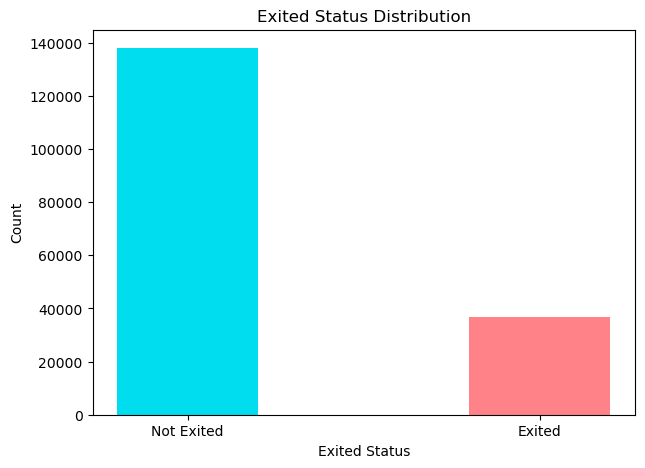

In [248]:
# Create 'Exited' counts series
exited_counts = pd.Series(exited_df)

# Define colors
colors = {0: '#00ddee', 1: '#FF8289'}

# Set bar width
bar_width = 0.4

# Create plot
fig, ax = plt.subplots(figsize=(7, 5))

# Plot data
ax.bar(exited_counts.index, exited_counts.values, width=bar_width, color=[colors[x] for x in exited_counts.index])

# Set title and labels
ax.set_title('Exited Status Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Exited Status')
ax.set_xticks(exited_counts.index)
ax.set_xticklabels(['Not Exited', 'Exited'])

# Display plot
plt.show()

## Observation
1. The bank retains a significant majority of its customers, with 138,072 customers having stayed, which suggests a strong customer retention rate.
2. However, there is also a notable churn rate, with 36,958 customers having exited. This figure represents an area of concern that the bank may need to address to improve customer satisfaction and retention strategies.

# Correlation Matrix

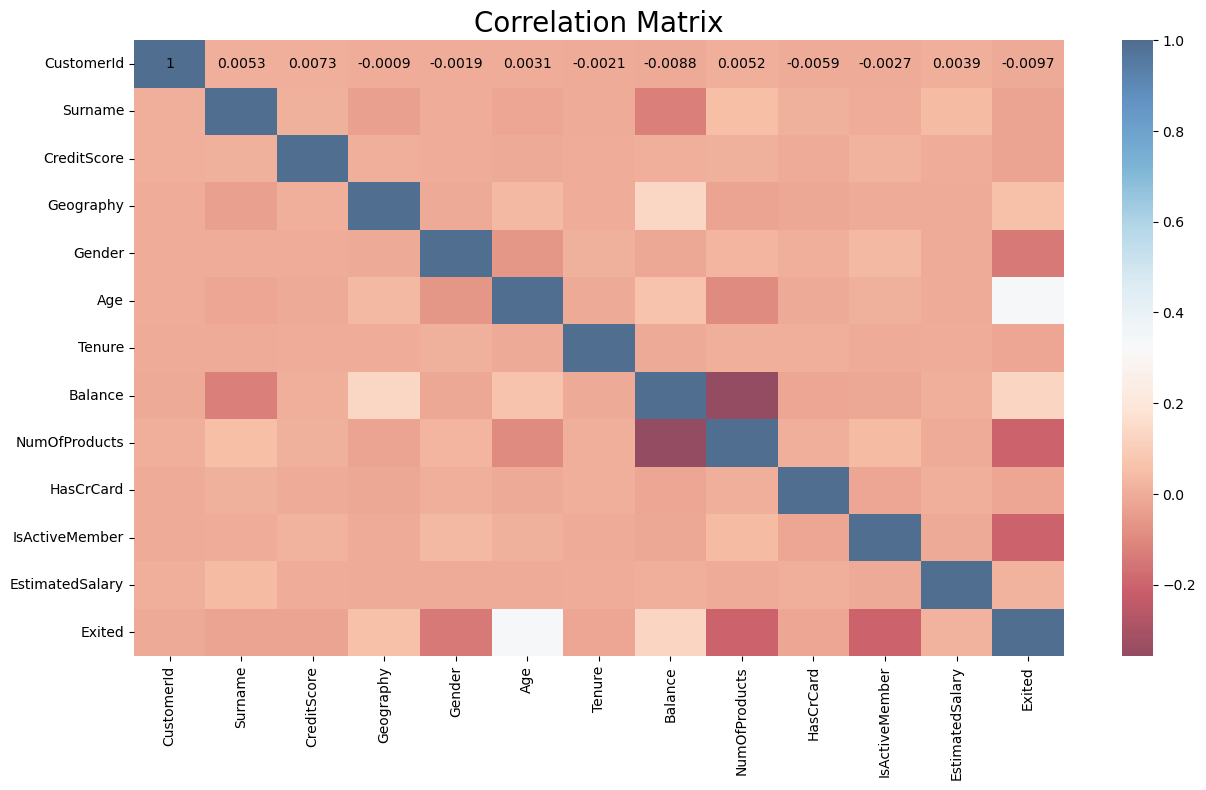

In [249]:
# Copy df
df2 = df.copy()

# Set color palette
sns.set_palette("pastel")

# Get categorical columns
cat_cols = df2.select_dtypes(include=['object', 'category']).columns

# Label encode categorical columns
for col in cat_cols:
    df2[col] = LabelEncoder().fit_transform(df2[col])

# Generate correlation matrix
correlation_matrix = df2.corr()
sort_corr_features = correlation_matrix.index 

# Plot correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(df2[sort_corr_features].corr(), annot=True, cmap='RdBu', alpha=0.7, square=False, annot_kws={"color": "black"})
plt.title('Correlation Matrix', fontsize=20)
plt.show()

## Correlation With Respect to Target Variable

In [250]:
# calculate the correlation of each feature with the target variable and sort in descending order
correlation = correlation_matrix[target].sort_values(ascending=False)
print_heading('Correlation of each feature with the target variable')
correlation

--------------------------------------------------
CORRELATION OF EACH FEATURE WITH THE TARGET VARIABLE
--------------------------------------------------


Exited             1.000000
Age                0.336606
Balance            0.128389
Geography          0.052202
EstimatedSalary    0.018598
CustomerId        -0.009723
Tenure            -0.019244
HasCrCard         -0.021122
Surname           -0.027017
CreditScore       -0.027241
Gender            -0.144131
NumOfProducts     -0.204509
IsActiveMember    -0.207205
Name: Exited, dtype: float64

## Observation:
1. Age has the strongest positive correlation with the target variable 'Exited', suggesting older customers are more likely to churn.
2. 'NumOfProducts' and 'IsActiveMember' show the strongest negative correlations, indicating customers with more products and active members are less likely to exit.
3. Many features such as 'Geography', 'EstimatedSalary', and 'HasCrCard' have very weak correlations with customer exit, hinting at minimal direct impact on churn.

## Visualizing Numerical Columns with Histograms and Probability Plots

In [270]:
# Import necessary libraries
from scipy.stats import norm, probplot

# Define function to plot histogram and QQ plot for each numerical column
def plot_histogram_and_boxplot(df, numerical_cols, cyan_palette=["#9468F8"]):
       # Loop through each numerical column
    for i, col in enumerate(numerical_cols):
        # Set figure size
        plt.figure(figsize=(15, len(numerical_cols) * 5))      
          # Create QQ plot for the current column
        ax1 = plt.subplot(len(numerical_cols), 2, 2 * i + 1) # Changed to 2*i + 1 for QQ plot first
        probplot(df[col], plot=ax1)
        ax1.get_lines()[0].set_color('#9468F8')
        ax1.get_lines()[1].set_color('#0000ff')
        plt.title(f'Probability plot of {col}')
        ax1.set_facecolor('#ffffff')

        # Create histogram for the current column
        ax2 = plt.subplot(len(numerical_cols), 2, 2 * i + 2) # Changed to 2*i + 2 for histogram second
        sns.histplot(df[col], kde=True, bins=30, color='blue')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

        # Display the plots
        plt.show()


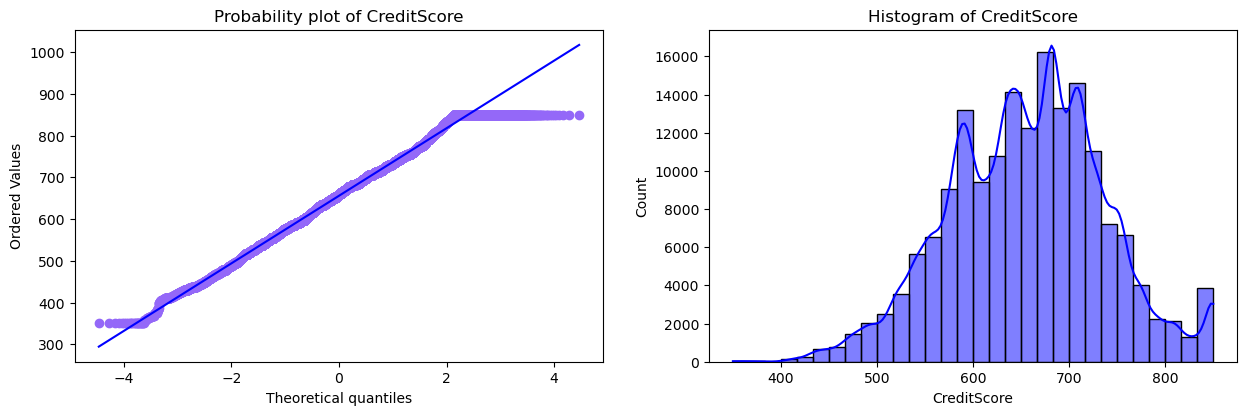

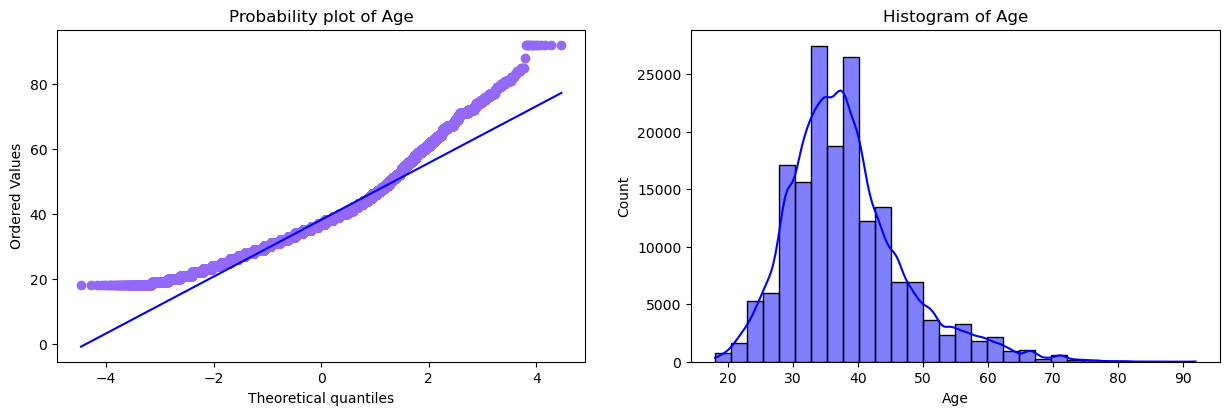

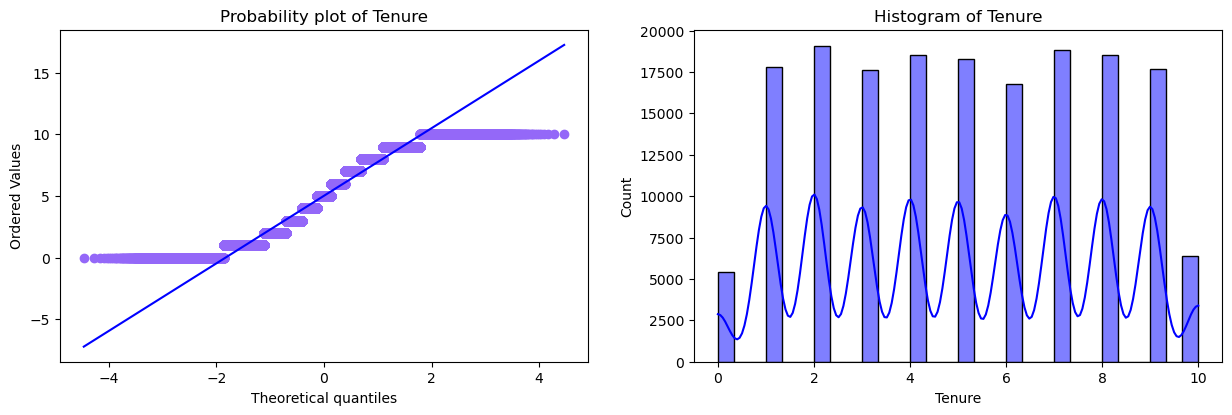

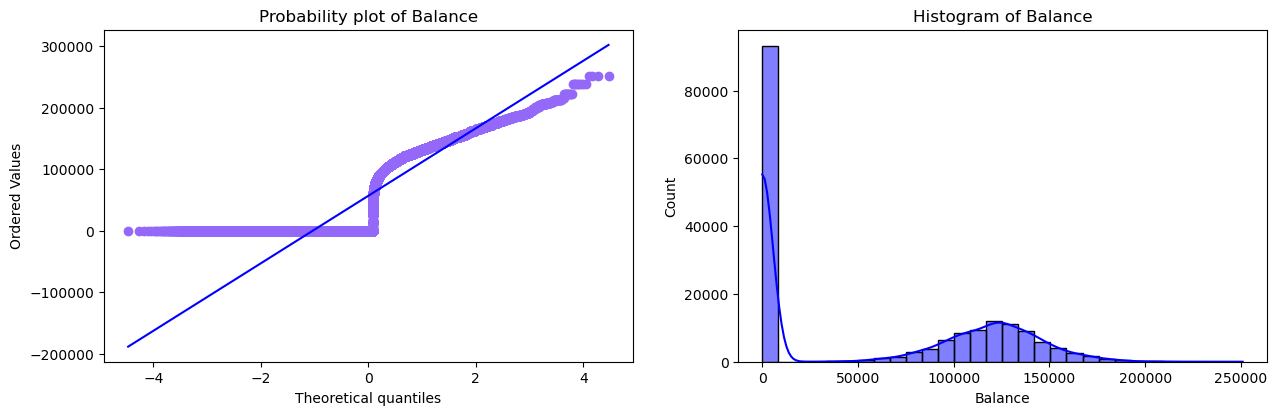

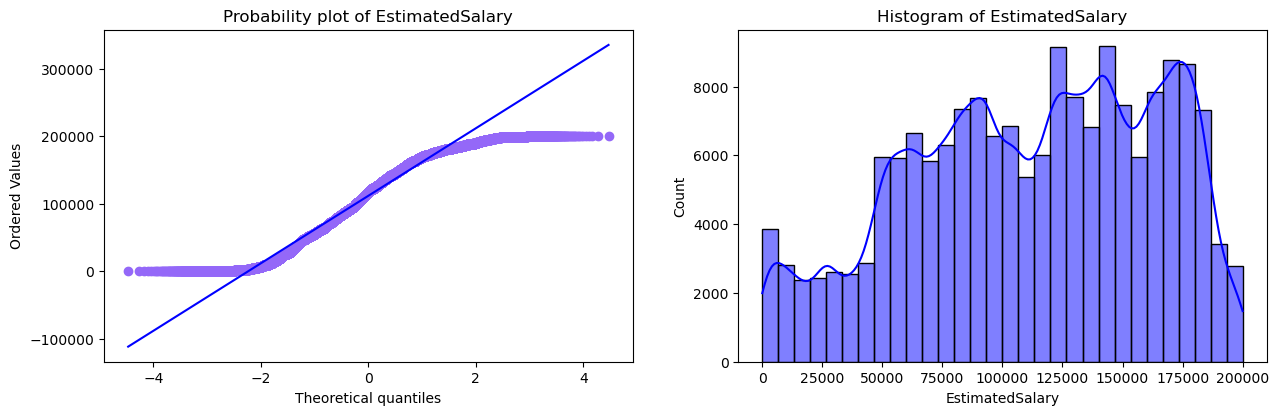

In [271]:
# Select numerical columns from the DataFrame
plot_num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Define columns to be dropped
columns_to_drop = ['CustomerId', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', target]

# Drop specified columns from the list of numerical columns
plot_num_cols = plot_num_cols.drop(columns_to_drop)

# Call the function to plot histograms and QQ plots for the remaining numerical columns
plot_histogram_and_boxplot(df, plot_num_cols)

In [253]:
round(pd.DataFrame(df[plot_num_cols].skew(), columns=['Skewness']),3)

,Skewness
CreditScore,-0.066
Age,0.980
Tenure,0.007
Balance,0.351
EstimatedSalary,-0.295


## Observations
* **CreditScore**: With a skewness of  -0.066, this variable is fairly symmetric, showing a slight leftward (negative) skew. However, the skewness is close enough to zero to assume that the distribution of Credit Scores is nearly normal.

* **Age**: The skewness of around 0.98 indicates a distribution that is moderately right-skewed. This suggests that there is a larger number of younger customers relative to older ones, with fewer customers at the higher end of the age range.

* **Tenure**: A skewness close to 0.007 implies that the distribution of Tenure is almost perfectly symmetric. This indicates a balanced distribution of tenure lengths among customers.

* **Balance**: The skewness value of 0.35 indicates a slight rightward skew. The fact that the median (50th percentile) is zero as I showed in the statistical information above, a significant number of customers have a balance of zero (as indicated by the 25th and 50th percentiles). This intensifies the impact of non-zero balances on the skewness. Even though the skewness is slight, the presence of many customers with a balance of zero implies that those with higher balances are less frequent but sufficiently numerous to pull the mean above the median, leading to the positive skew.

* **EstimatedSalary**: With a skewness of approximately -0.29, the distribution shows a small leftward (negative) skew. The distribution of Estimated Salaries leans slightly towards the lower end, meaning there are somewhat more customers with salaries below the mean than above it.

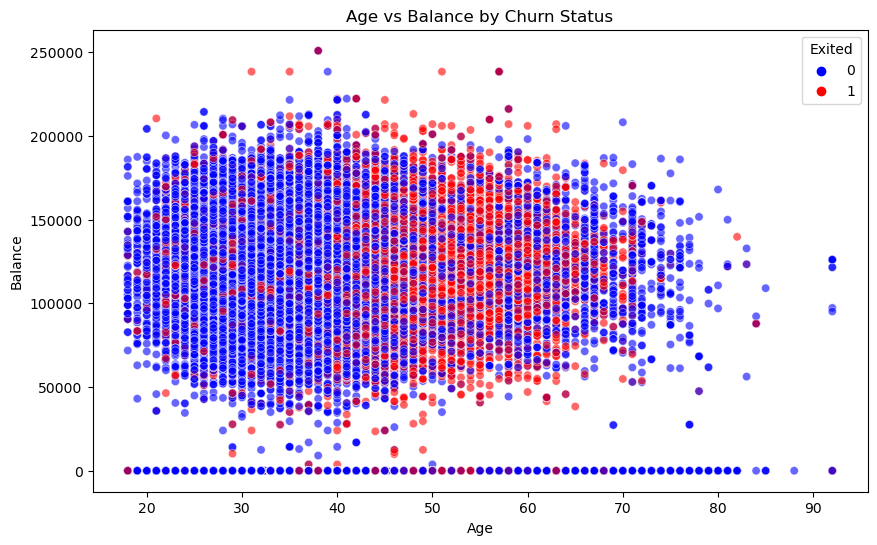

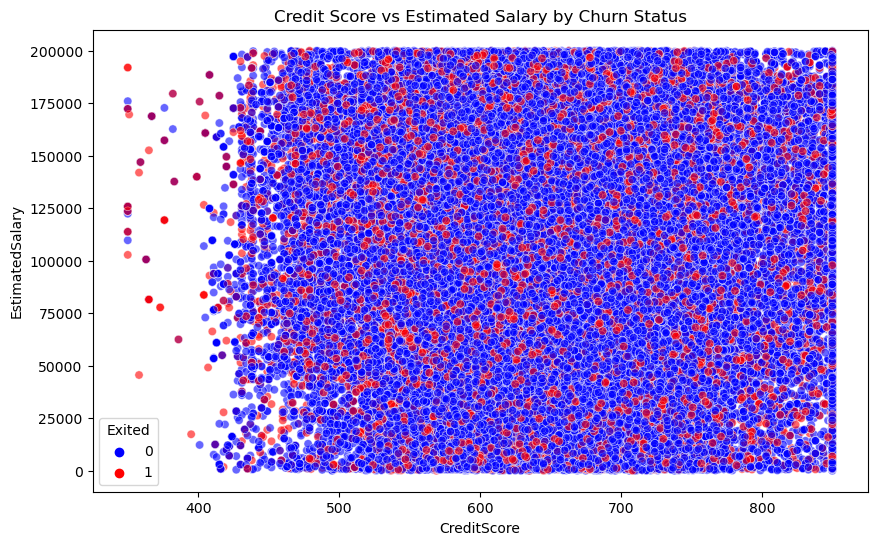

In [275]:
# Combination 1: Age, Balance, and Exited
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=df, palette=['blue', 'red'], alpha=0.6)
plt.title('Age vs Balance by Churn Status')
plt.show()

# Combination 2: CreditScore, EstimatedSalary, and Exited
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CreditScore', y='EstimatedSalary', hue='Exited', data=df, palette=['blue', 'red'], alpha=0.6)
plt.title('Credit Score vs Estimated Salary by Churn Status')
plt.show()


# Test with Machine Learning Models

In [254]:
# Define features and target
X = df.drop(['Exited', 'CustomerId', 'Surname'], axis=1)
y = df['Exited']

# Import train_test_split
from sklearn.model_selection import train_test_split

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical features
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)


# Optimizing LightGBM Classifier with GridSearchCV and Cross-Validation

In [255]:
# Initialize variables and define a list of models for evaluation# Define the model
model_scores = []

# cross val results
cv_res = {}

# Retain the b best estimator
best_accuracy = 0
# Initialize a variable to store the best estimator
best_estimator = None

# confusion matrix
cfx = []

models = [
    {'name': 'LGBM Classifier', 'model': lgb.LGBMClassifier(random_state=42, verbose=0)},
    {'name': 'XGB Classifier', 'model': XGBClassifier(random_state=42, verbose=0)},
    {'name': 'CatBoost Classifier', 'model': CatBoostClassifier(random_state=42, verbose=0)}
    add random forest
    {'name': 'Random Forest Classifier', 'model': RandomForestClassifier(random_state=42, verbose=0, class_weight='balanced')}

]

In [256]:

# Use Pipeline and GridSearchCV to find the best model and its best parameters
for model in models:
    # create a pipeline with the current model
    pipeline = Pipeline([('clf', model['model'])])   
    params = {
        'clf__n_estimators': [100],
        'clf__verbose': [0],
    }

    metrics = {}
    #  custom scoring 
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted')
    }

    # Initialize GridSearchCV with the model, parameter grid, and scoring
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=params,
        scoring=scoring,
        refit='f1',
        cv=5,
        verbose=False,      
    )

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_model = grid_search.best_estimator_

    # predictions with the best model
    y_pred = best_model.predict(X_test)

    # Calculate performance metrics for the best model
    cv_results = cross_validate(model['model'], X_train, y_train, cv=5,scoring="accuracy")  
    accuracy = round(accuracy_score(y_test, y_pred), 5)
    precision = round(precision_score(y_test, y_pred, average='weighted'), 5)
    recall = round(recall_score(y_test, y_pred, average='weighted'), 5)
    f1 = round(f1_score(y_test, y_pred, average='weighted'), 5)

    # Retain the best model
    if accuracy > best_accuracy:  
      best_accuracy = accuracy
      best_estimator = grid_search.best_estimator_
      # Store cross-validation results for the best model
      cv_res[model['name']] = grid_search.cv_results_

    # Append metrics to the results list
    model_scores.append({
        'Model': model['name'],
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }) 
    
    confution_matrix = confusion_matrix(y_test, y_pred)
    cfx.append(confution_matrix)
   
# Display classification models' performance metrics
print_heading("Classification Models Performance")
sorted_metrics = pd.DataFrame(model_scores).set_index('Model')
sorted_metrics.sort_values(by='F1 Score', ascending=False)

--------------------------------------------------
CLASSIFICATION MODELS PERFORMANCE
--------------------------------------------------


,Accuracy,Precision,Recall,F1 Score
Model,,,,
LGBM Classifier,0.86617,0.85834,0.86617,0.85855
XGB Classifier,0.86439,0.85642,0.86439,0.85700


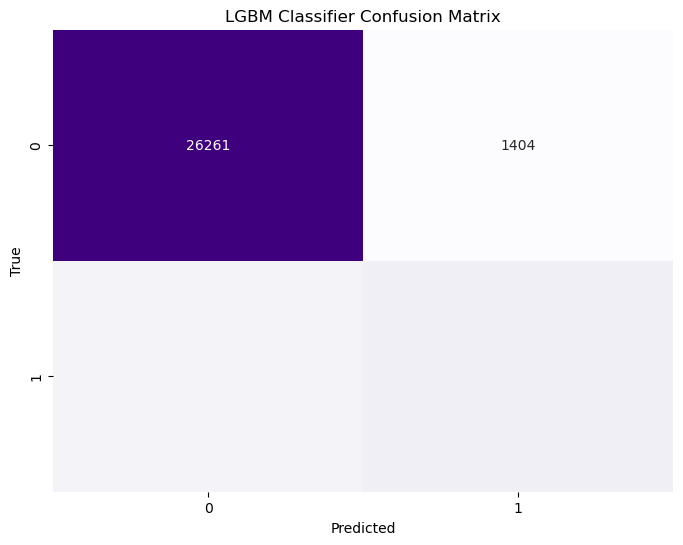

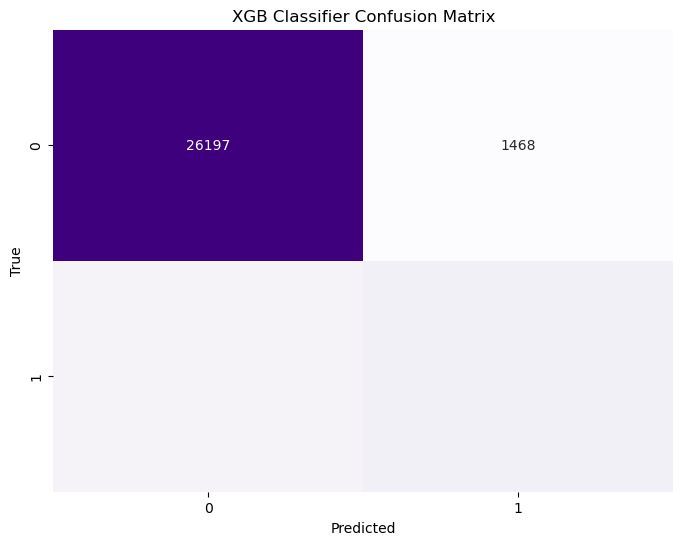

In [257]:

for idx, conf_matrix in enumerate(cfx):
    model_name = sorted_metrics.index[idx]
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [258]:
df_test = df_test.drop(['id', 'CustomerId', 'Surname'], axis=1)

# use label encoding to encode categorical features
le = LabelEncoder()
for col in df_test.columns:
    if df_test[col].dtype == 'object' or df_test[col].dtype == 'category':
        df_test[col] = le.fit_transform(df_test[col])

In [259]:
# Predict probabilities for the test set using the best model 
y_pred = best_estimator.predict_proba(X_test)[:, 1]

In [261]:
# generate roc and auc scores
print_heading("ROC AUC Score")
roc_auc_score(y_test, y_pred)

--------------------------------------------------
ROC AUC SCORE
--------------------------------------------------


0.8892611587844359

In [ ]:
# load the predictions to the submission file
submission['Exited'] = y_pred
submission.to_csv('submission_ml.csv', index=False)

# Using Deep Learning

In [219]:
# apply standard scaler to scale the numerical features
from sklearn.preprocessing import StandardScaler
X = df.drop(['Exited', 'Surname', 'CustomerId'], axis=1)
y = df['Exited']

# apply label encode to df
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [221]:
# convert cat features to numerical via label encoding
le = LabelEncoder()
for col in df_test.columns:
    if df_test[col].dtype == 'object' or df_test[col].dtype == 'category':
        df_test[col] = le.fit_transform(df_test[col])

# Binary Classification Using PCA-Reduced Features and Deep Learning

In [222]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model_tf = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define the callback function
early_stopping = EarlyStopping(patience=20, monitor='val_loss')

# Compile the model
model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model and plot the training and testing loss and accuracy at each epoc
history = model_tf.fit(X_train_pca, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_pca, y_test), 
                    callbacks=[early_stopping])


Epoch 1/100
4376/4376 [==============================] - 56s 12ms/step - loss: 0.3399 - accuracy: 0.8562 - val_loss: 0.3289 - val_accuracy: 0.8629
Epoch 2/100
4376/4376 [==============================] - 50s 12ms/step - loss: 0.3282 - accuracy: 0.8629 - val_loss: 0.3256 - val_accuracy: 0.8627
Epoch 3/100
4376/4376 [==============================] - 35s 8ms/step - loss: 0.3264 - accuracy: 0.8633 - val_loss: 0.3252 - val_accuracy: 0.8642
Epoch 4/100
4376/4376 [==============================] - 33s 7ms/step - loss: 0.3252 - accuracy: 0.8638 - val_loss: 0.3241 - val_accuracy: 0.8641
Epoch 5/100
4376/4376 [==============================] - 44s 10ms/step - loss: 0.3247 - accuracy: 0.8639 - val_loss: 0.3240 - val_accuracy: 0.8624
Epoch 6/100
4376/4376 [==============================] - 56s 13ms/step - loss: 0.3242 - accuracy: 0.8637 - val_loss: 0.3221 - val_accuracy: 0.8639
Epoch 7/100
4376/4376 [==============================] - 59s 14ms/step - loss: 0.3237 - accuracy: 0.8645 - val_loss: 0.3

KeyboardInterrupt: 

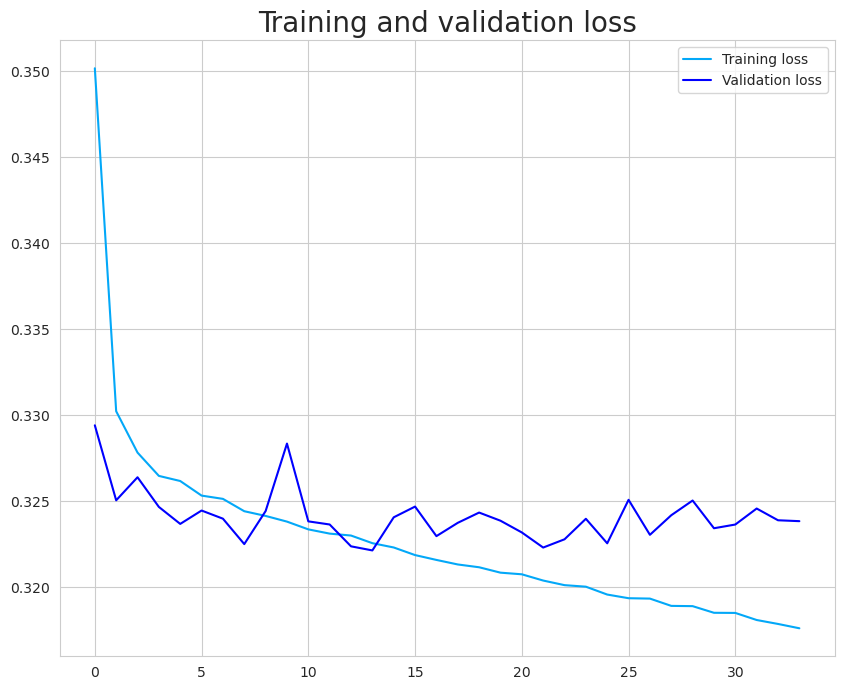

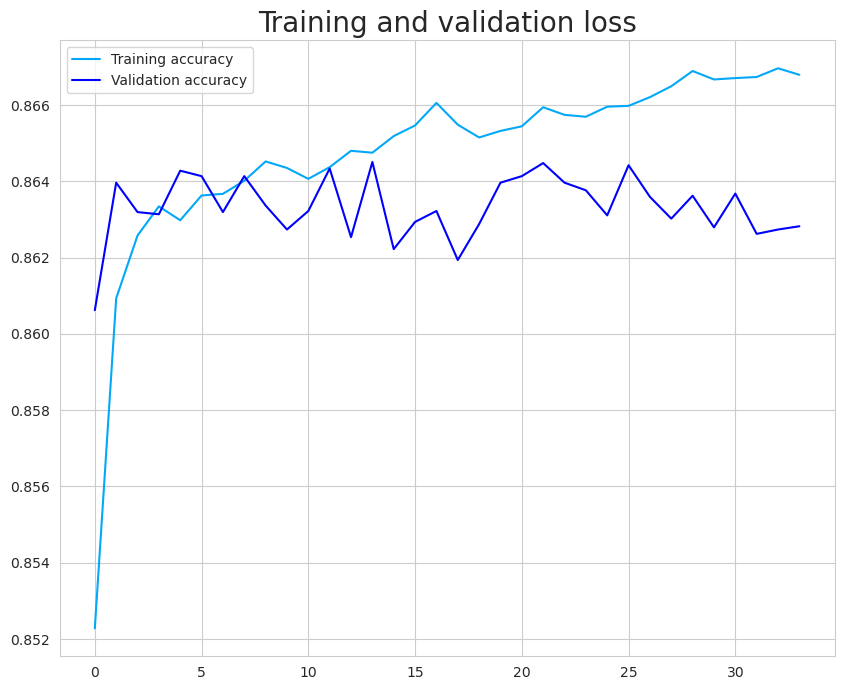

In [ ]:
# plot the training and testing loss and accuracy at each epoc
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['loss'], label='Training loss', color="#03a8F8")
ax.plot(history.history['val_loss'], label='Validation loss', color="#0000ff")
plt.title('Training and validation loss', fontsize=20)
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['accuracy'], label='Training accuracy', color='#03a8F8')
ax.plot(history.history['val_accuracy'], label='Validation accuracy', color="#0000ff")
plt.title('Training and validation loss', fontsize=20)
ax.legend()
plt.show()

In [ ]:
y_pred_dl_prob = model_tf.predict(X_test_pca)



NameError: name 'model_tf' is not defined

In [ ]:
submission['Exited'] = y_pred_dl_prob
submission.to_csv('submission.csv', index=False)

# Conclusion
The analysis of the bank dataset concluded with the successful application of advanced machine learning techniques, such as CatBoost, Random Forest, LightGBM, and XGBoost, as well as a deep learning method. These models proved highly effective, achieving an ROC-AUC score of 88.92% in predicting customer churn. The study provides actionable insights that can inform and enhance customer retention strategies.